In [4]:
import os
import sys

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, project_root)
os.chdir(project_root)

In [5]:
from sentinelhub import  SHConfig
import  logging

import geopandas as gpd
from utils.geometry_utils import calculate_split_shape
from utils.visualization_utils import show_splitter
from src.Bbox_splitter import BBoxspliter , GeoDataFrameCreator
from src.download_satellite_imagery import DownloadWithSentinel , download_and_structure_images

from config.config import EPSG_UTM, TILE_SIZE, EPSG_UTM_1, EPSG_4326, gdf , get_sentinel_hub_config , EVALSCRIPT_ALL_BANDS, OUTPUT_FOLDER, YEAR, PROVIDER, N_CHUNKS
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

gdf = gdf[1:20]
gdf.crs = EPSG_4326

In [6]:

TILE_SIZE = 20
n, m = calculate_split_shape(gdf, TILE_SIZE, TILE_SIZE, EPSG_UTM)
logging.info(f"Nombre de tuiles par dimension (largeur x hauteur) : {n} x {m}")
bbox = BBoxspliter()
bbox_splitter = bbox.bboxsplitter_epsg(gdf, n, m, 32629)

2024-07-05 14:43:58,395 - INFO - Nombre de tuiles par dimension (largeur x hauteur) : 16 x 12


In [7]:
src_crs = EPSG_UTM_1
dst_crs = EPSG_4326
geo_df_creator = GeoDataFrameCreator(src_crs, dst_crs)
bbox_list = bbox_splitter.get_bbox_list()
gdf_tiles = geo_df_creator.create_geo_dataframe(bbox_list)

In [8]:
logging.info(gdf_tiles['geometry'][0])

2024-07-05 14:44:01,332 - INFO - POLYGON ((-7.7983169123372775 32.16152334095478, -7.796135059875861 32.327057193891726, -8.000515440663293 32.32884174636732, -8.002327044843826 32.16329656617335, -7.7983169123372775 32.16152334095478))


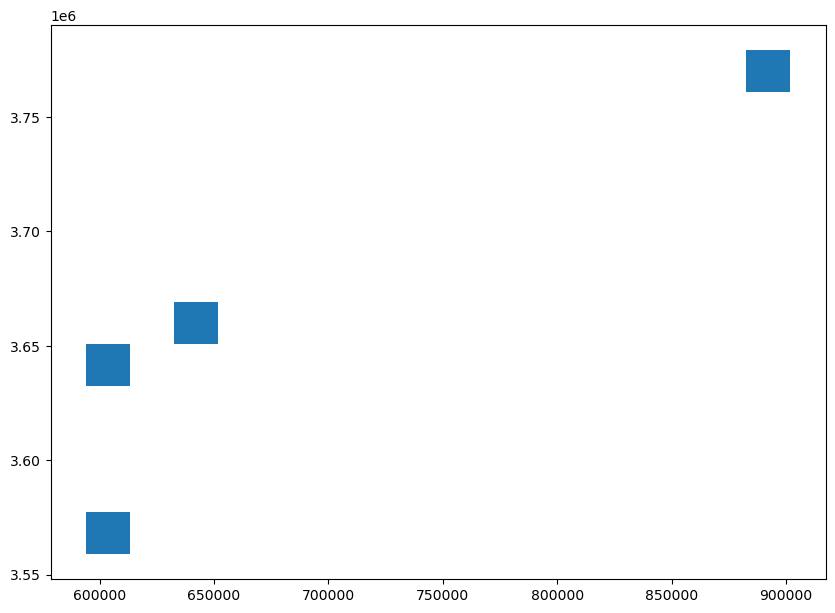

In [9]:
gdf_tiles = gpd.GeoDataFrame(geometry=[bbox.geometry for bbox in bbox_splitter.get_bbox_list()])
ax = gdf_tiles.plot(figsize=(10, 10))

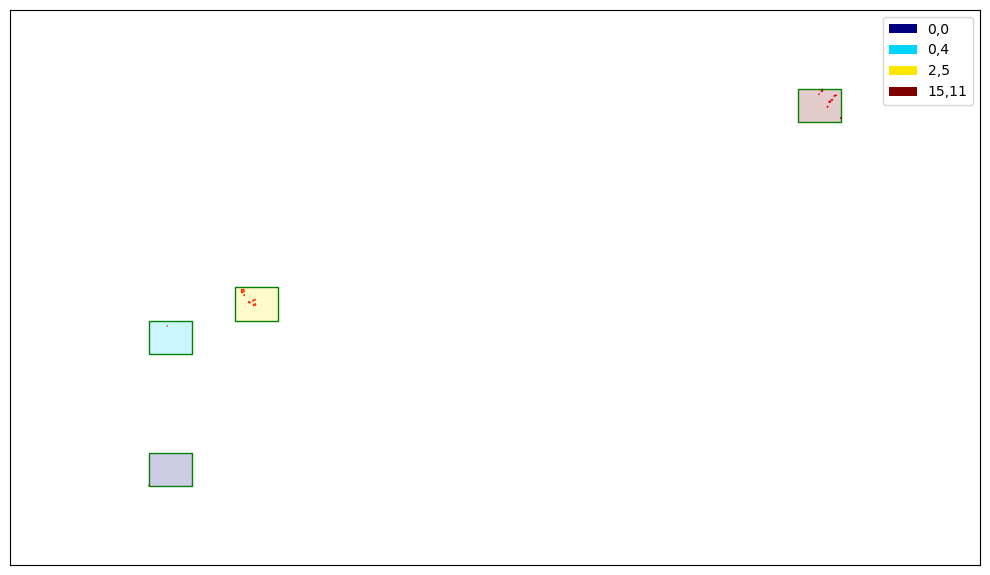

In [10]:
bbox_splitter = bbox.bboxsplitter_epsg(gdf, n,m, 4326)
show_splitter(bbox_splitter, show_legend=True)

In [11]:
config = get_sentinel_hub_config()
download_and_structure_images(
        OUTPUT_FOLDER, 
        YEAR, 
        PROVIDER, 
        N_CHUNKS, 
        bbox_splitter, 
        EVALSCRIPT_ALL_BANDS, 
        config
    )

/Users/Hiba/anaconda3/lib/python3.10/site-packages/sentinelhub/geometry.py:115: SHDeprecationWarning: Initializing `BBox` objects from `shapely` geometries will no longer be possible in future versions. Use the `bounds` property of the `shapely` geometry to initialize the `BBox` instead.
  x_fst, y_fst, x_snd, y_snd = self._to_tuple(bbox)
2024-07-05 14:44:41,378 - INFO - Image downloaded for polygon: POLYGON -8.002312 32.163286_-8.002312 32.32300608333333_-7.79295425 32.32300608333333_-7.79295425 32.163286_-8.002312 32.163286
2024-07-05 14:45:23,709 - INFO - Image downloaded for polygon: POLYGON -8.002312 32.80216633333333_-8.002312 32.961886416666665_-7.79295425 32.961886416666665_-7.79295425 32.80216633333333_-8.002312 32.80216633333333
2024-07-05 14:45:58,362 - INFO - Image downloaded for polygon: POLYGON -7.5835965 32.961886416666665_-7.5835965 33.1216065_-7.37423875 33.1216065_-7.37423875 32.961886416666665_-7.5835965 32.961886416666665
2024-07-05 14:46:31,499 - INFO - Image downl